# Readme

该`notebook`用于生成`specfem2d`的`SOURCE`，`STATIONS`，以及用来画图

In [3]:
from seisflows.tools.model import Model
import glob
import os

cwd = os.getcwd()
output_dir = os.path.join(cwd, 'output')


## Plot 真实模型和初始模型

### Plot 

no coordinates found for assumed SPECFEM2D model, will not be able to plot figures
no coordinates found for assumed SPECFEM2D model, will not be able to plot figures


/home/erbiaoger/MyProjects/Seisflows/work/day_3/seisflows_checkboard/output/GRADIENT_30


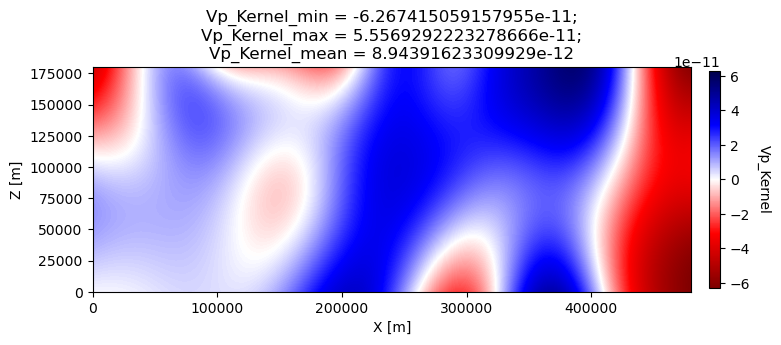

no coordinates found for assumed SPECFEM2D model, will not be able to plot figures


/home/erbiaoger/MyProjects/Seisflows/work/day_3/seisflows_checkboard/output/MODEL_30


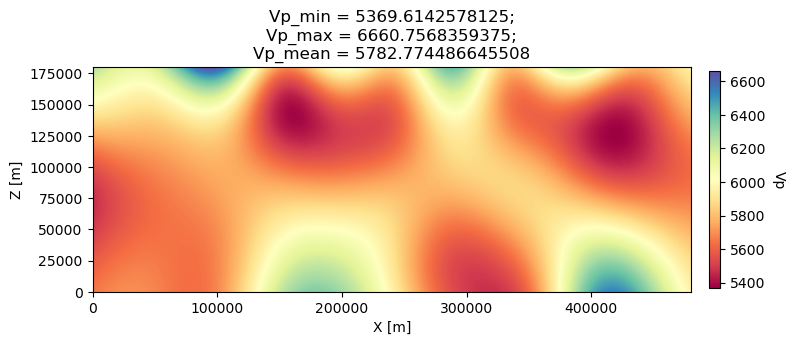

In [5]:
gradients = sorted(glob.glob(os.path.join(output_dir, 'GRADIENT_*')))
models = sorted(glob.glob(os.path.join(output_dir, 'MODEL_*')))

m_init = Model(os.path.join(output_dir,'MODEL_INIT'))
m_true = Model(os.path.join(output_dir, 'MODEL_TRUE'))

print(gradients[-1])
g_end = Model(gradients[-1])
g_end.coordinates = {}
g_end.coordinates["x"] = m_true.coordinates["x"]
g_end.coordinates["z"] = m_true.coordinates["z"]
g_end.plot2d('vp_kernel')

print(models[-3])
m_end = Model(models[-3])
m_end.coordinates = {}
m_end.coordinates["x"] = m_true.coordinates["x"]
m_end.coordinates["z"] = m_true.coordinates["z"]
m_end.plot2d('vp')


#m_init.save('/home/zhangzhiyu/MyProjects/Seisflows/work/day_3/3/output/m_init.npz')
#m_true.plot2d('vs')
#m_01.save('/home/zhangzhiyu/MyProjects/Seisflows/work/day_3/3/output/m.npz')

### Make result gif 

In [ ]:
## make result fig

import subprocess
import imageio

with imageio.get_writer(uri='m.gif', mode='I', duration=1000) as writer_m:
    with imageio.get_writer(uri='g.gif', mode='I', duration=1000) as writer_g:
        for i in range(1, len(gradients)+1):
            g = 'GRADIENT_{:02d}'.format(i)
            m = 'MODEL_{:02d}'.format(i)

            call = 'seisflows plot2d ' + g + ' vs_kernel --savefig ' + g + '.png' 
            subprocess.call(call, shell=True)
            call = 'seisflows plot2d ' + m + ' vs --savefig ' + m + '.png' 
            subprocess.call(call, shell=True)
            writer_m.append_data(imageio.imread(m+'.png'))
            writer_g.append_data(imageio.imread(g+'.png'))


### Plot station seismic trace

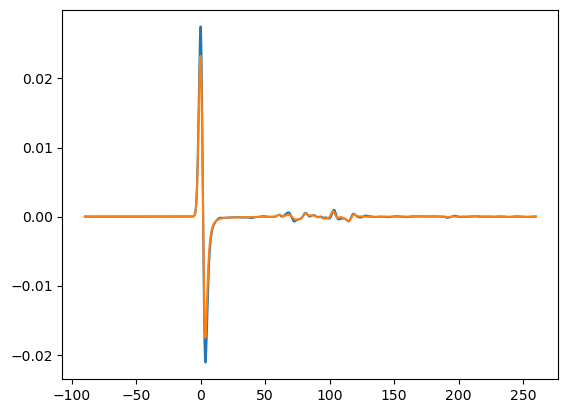

In [11]:
import numpy as np
from matplotlib import pyplot as plt
trace_dir = os.path.join(cwd, 'scratch/solver/mainsolver/traces/')
os.chdir(trace_dir)

t, obs_x = np.loadtxt('./obs/AA.S0008.BXX.semd').T
t, syn_x = np.loadtxt('./syn/AA.S0008.BXX.semd').T

plt.plot(t, obs_x)
plt.plot(t, syn_x)

### Plot seismology

In [15]:
os.listdir(trace_dir)

['adj', 'obs', 'syn']

In [12]:
#t_init, d_init = np.loadtxt("AA.S0001.BXY.semd").T
import numpy as np
import matplotlib.pyplot as plt

obj_dir = os.path.join(trace_dir, 'obs')


BXZS = sorted(glob.glob(os.path.join('AA.*.BXZ.semd')))
# convert string to float: 'AA.S0001.BXX.semd'
for BXZ in BXZS:
    t_init, d_init = np.loadtxt(BXZ).T
plt.plot(t_init, d_init)

NameError: name 't_init' is not defined

/home/zhangzhiyu/MyProjects/Seisflows/specfem2d/EXAMPLES/anisotropic_isotropic_model/OUTPUT_FILES


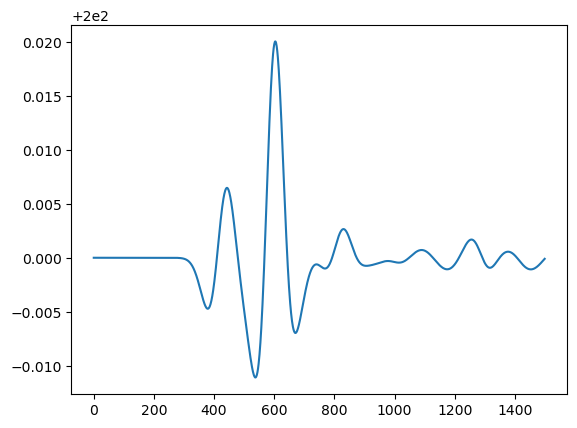

In [308]:
%cd /home/zhangzhiyu/MyProjects/Seisflows/specfem2d/EXAMPLES/anisotropic_isotropic_model/OUTPUT_FILES/
t_data = {}
d_data = {}
for i in range(1, 2):
    if i < 10:
        file = 'AA.S000' + str(i) + '.BXZ.semd'
    else:
        file = 'AA.S00' + str(i) + '.BXZ.semd'
    t, d = np.loadtxt(file).T
    t_data[file] = t
    d_data[file] = d
    plt.plot(d+i*200)
    

/tmp/ipykernel_929330/879586461.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if a==[]:


 PlotWig: data range [-0.202625, 0.144076], plotted max 0.007286 



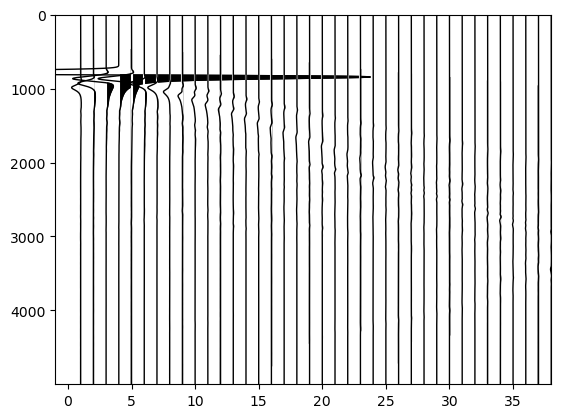

In [219]:
import numpy as np
import matplotlib.pyplot as plt

def wigb(a=[],scal=0,x=0,z=0,amx=0):
#  WIGB: Plot seismic data using wiggles.
#
#  WIGB(a,scal,x,z,amx) 
#
#  IN  a:     地震数据 (a ndarray, traces are columns)
#      scale: multiple data by scal
#      x:     x轴(often offset)
#      z:     y轴 (often time)
#
#  Note
#
#    If only 'a' is enter, 'scal,x,z,amn,amx' are set automatically; 
#    otherwise, 'scal' is a scalar; 'x, z' are vectors for annotation in 
#    offset and time, amx are the amplitude range.
#
    if a==[]:
        nx, nz = 10, 10
        a = np.random.random((nz,nx))
        # print(a)
    nz, nx = a.shape

    trmx = np.max(np.abs(a),axis=0)
    if amx==0:
        amx = np.mean(trmx)
    if x==0:
        x = np.arange(1,nx+1,1)
        z = np.arange(1,nz+1,1)
    if scal==0:
        scal = 1
    
    if nx <=1:
        print('ERR:PlotWig: nx has to be more than 1')
        return 
    
# take the average as dx
    dx1 = np.abs(x[1:nx]-x[0:nx-1])
    dx = np.median(dx1)


    dz = z[1]-z[0]
    xmax, xmin = a.max(), a.min()

    a = a * dx / amx
    a = a * scal

    print(' PlotWig: data range [%f, %f], plotted max %f \n'%(xmin,xmax,amx))

    # set display range

    x1 = min(x) - 2.0*dx
    x2 = max(x) - 2.0*dx
    z1 = min(z) - dz
    z2 = max(z) - dz

    fig = plt.figure()
    plt.xlim([x1,x2])
    plt.ylim([z1,z2])
    plt.gca().invert_yaxis()


    zstart, zend = z[0], z[-1]

    fillcolor = [0, 0, 0]
    linecolor = [0, 0, 0]
    linewidth = 1.


    for i in range(0,nx):
        if not trmx[i]==0:
            tr = a[:,i]
            s = np.sign(tr)
            i1 = []
            for j in range(0,nz):
                if j==nz-1:
                    continue
                if not s[j]==s[j+1]:
                    i1.append(j)
            npos = len(i1)

            i1 = np.array(i1)
            if len(i1)==0:
                zadd=np.array(())
            else:
                zadd = i1 + tr[i1] / (tr[i1]-tr[i1+1])
            aadd = np.zeros(zadd.shape)

            zpos = np.where(tr>0)
            tmp = np.append(zpos,zadd)
            zz = np.sort(tmp)
            # iz =np.array(())
            # for j in range(0,len(tmp)):
            #     iz=np.append(iz,np.where(zz==tmp[j]))
            iz = np.argsort(tmp)
            aa = np.append(tr[zpos],aadd)
            iz=iz.astype(int)
            aa = aa[iz]


            if tr[0]>0:
                a0,z0=0,1.00
            else:
                a0,z0=0,zadd[0]
            if tr[nz-1]>0:
                a1,z1=0,nz
            else:
                a1,z1=0,zadd.max()
            
            zz = np.append(np.append(np.append(z0,zz),z1),z0)
            aa = np.append(np.append(np.append(a0,aa),a1),a0)

            zzz = zstart + zz * dz - dz
            plt.fill(aa+x[i], zzz+1, color=fillcolor)
            plt.plot(x[i]+[0,0],[zstart,zend],color=[1,1,1])

            plt.plot(x[i]+tr,z,color=linecolor,linewidth=linewidth)
        else:
            plt.plot([x[i],x[i]],[zstart,zend],color=linecolor,linewidth=linewidth)
    plt.show()


        

if __name__=='__main__':
    wigb(a=d_data.T)


In [262]:
init = np.load('m_init.npz')
data = np.load('m.npz')

In [258]:
data.files
init.files
print(data['x_coord'].shape)
print(data['z_coord'].shape)
print(data['vs'].shape)

(4, 10000)
(4, 10000)
(4, 10000)


/home/zhangzhiyu/MyProjects/Seisflows/work/day_3/3/output


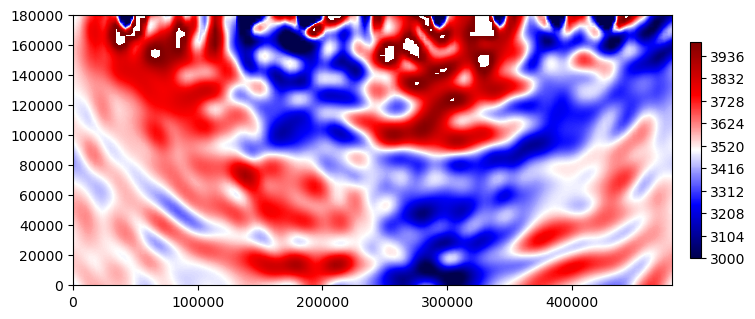

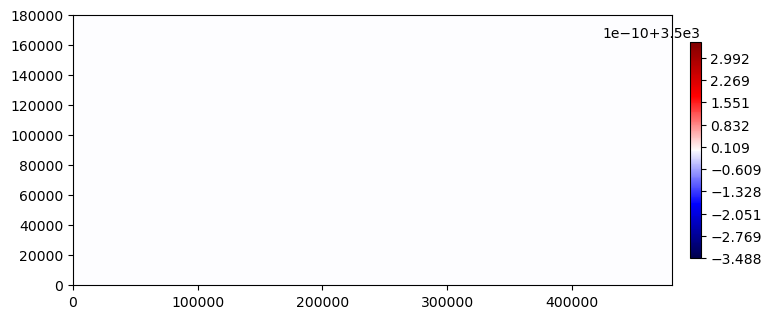

In [291]:
%cd /home/zhangzhiyu/MyProjects/Seisflows/work/day_3/3/output/

data = np.load('m.npz')
x, z, vs = np.array([]), np.array([]), np.array([])
for iproc in range(data['vs'].shape[0]):
    x = np.append(x, data['x_coord'][iproc, :])
    z = np.append(z, data['z_coord'][iproc, :])
    vs = np.append(vs, data['vs'][iproc, :])


r = (max(x) - min(x))/(max(z) - min(z))
rx = r/np.sqrt(1 + r**2)
rz = 1/np.sqrt(1 + r**2)
 
vs[vs<3000] = 3000
vs[vs>4000] = 4000

f = plt.figure(figsize=(10*rx, 10*rz))
p = plt.tricontourf(x, z, vs, cmap='seismic', levels=250)
plt.colorbar(p, shrink=0.8, pad=0.025)



data = np.load('m_init.npz')
x, z, vs = np.array([]), np.array([]), np.array([])
for iproc in range(data['vs'].shape[0]):
    x = np.append(x, data['x_coord'][iproc, :])
    z = np.append(z, data['z_coord'][iproc, :])
    vs = np.append(vs, data['vs'][iproc, :])


r = (max(x) - min(x))/(max(z) - min(z))
rx = r/np.sqrt(1 + r**2)
rz = 1/np.sqrt(1 + r**2)
 
vs[vs<3000] = 3000
vs[vs>4000] = 4000

f = plt.figure(figsize=(10*rx, 10*rz))
p = plt.tricontourf(x, z, vs, cmap='seismic', levels=250)
plt.colorbar(p, shrink=0.8, pad=0.025)

### Plot SeisFlows-Elastic-Foothill-Checkerboard model

/home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard


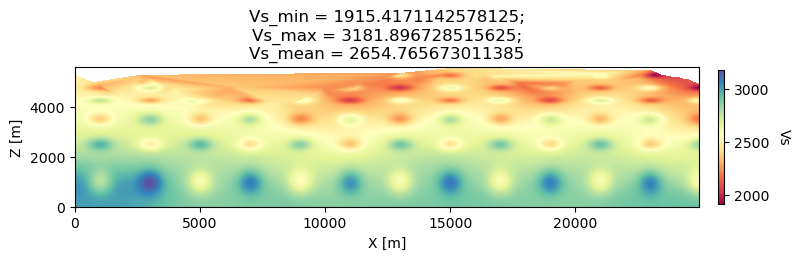

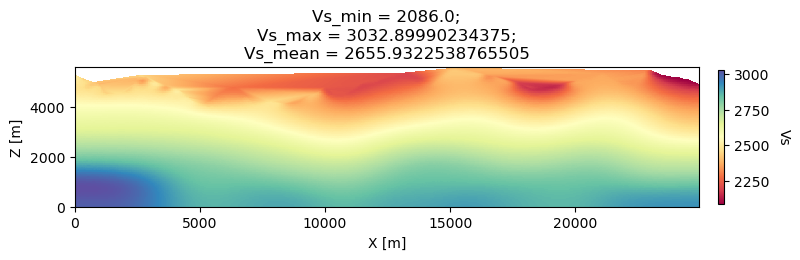

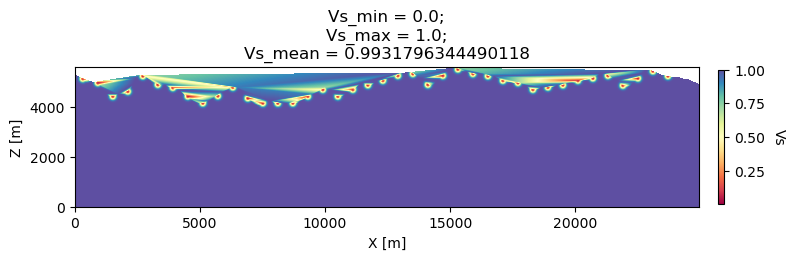

In [83]:
%cd /home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard/
mask = Model('model_checkerboard')
mask.plot2d('vs')
mask = Model('model_initial')
mask.plot2d('vs')
mask = Model('mask_model')
mask.plot2d('vs')

mask.save('mask.npz')

In [96]:
mask = np.load('mask.npz')
new = mask['vs'].reshape(277, -1)


In [98]:
new

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99983102, 0.999937  , 0.99996001, ..., 0.73292702, 0.84319198,
        0.889741  ],
       [0.83157301, 0.88681698, 0.95605999, ..., 0.15230501, 0.35556099,
        0.47632   ],
       [0.65047199, 0.72746801, 0.84319198, ..., 1.        , 1.        ,
        1.        ]])

/home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard/new/scratch/optimize
/home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard


(<Figure size 975.854x218.422 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fa1f0c9aaa0>)

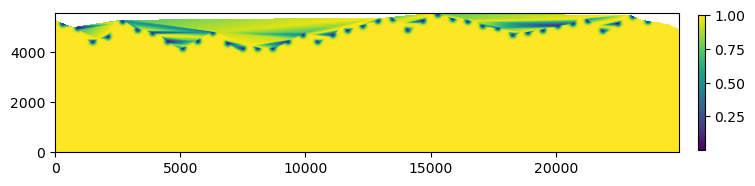

In [14]:
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from seisflows.tools.graphics import plot_2d_contour, plot_2d_image

%cd /home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard/new/scratch/optimize/
%cd /home/erbiaoger/MyProjects/Seisflows/SeisFlows-Elastic-Foothill-Checkerboard/
che = np.load('mask.npz')
che.files

vs = che['vs'].reshape(-1)
x = che['x_coord'].reshape(-1)
z = che['z_coord'].reshape(-1)



plot_2d_image(x, z, vs)



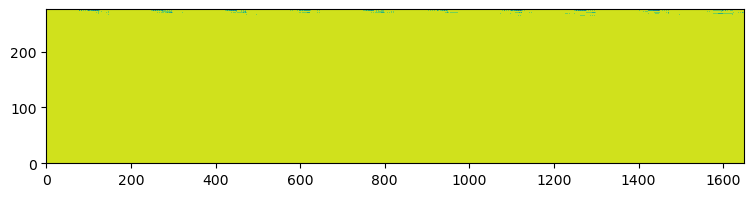

In [21]:
vs = vs.reshape(277, -1)
fig = plt.figure(figsize=(9, 2))
plt.contourf(vs)

In [24]:
from seisflows.tools.array import meshsmooth

### Plot 地震灰度图

/home/erbiaoger/MyProjects/Seisflows/work/day_3/newnew/specfem2d_workdir/OUTPUT_FILES


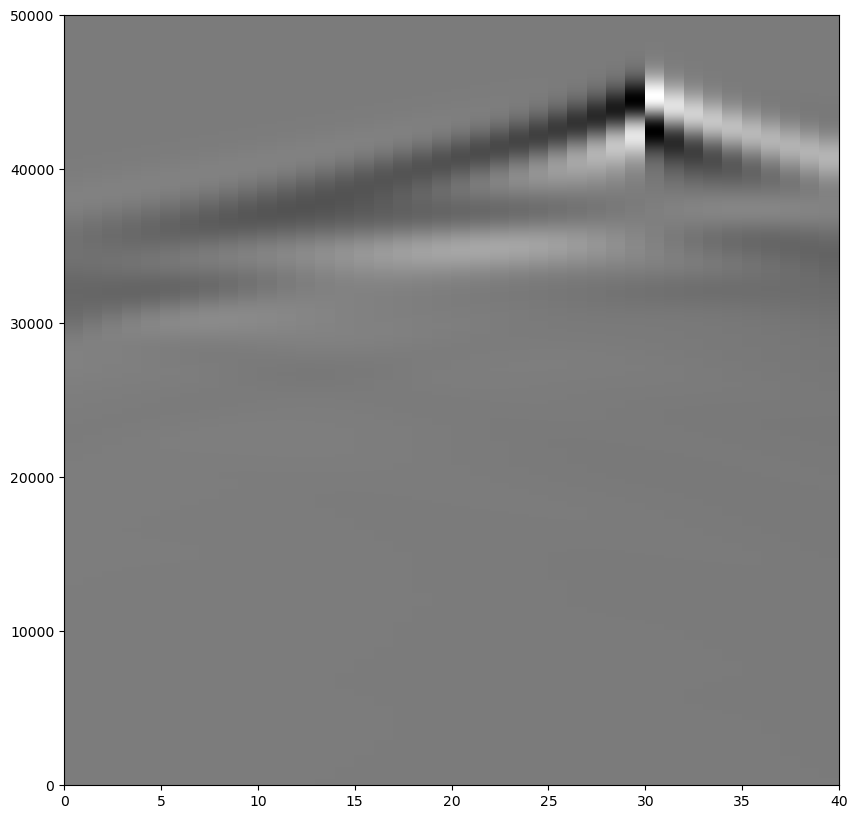

In [57]:

import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from seisflows.tools.specfem import read_fortran_binary
%cd /home/erbiaoger/MyProjects/Seisflows/work/day_3/newnew/specfem2d_workdir/OUTPUT_FILES/

def plot_seisgraph(N, nametype='semd'):

    t1, d1 = np.array([]), np.array([])
    for i in range(1, N+1):
        if i < 10:
            file = 'AA.S000' + str(i) + '.BXX.' + nametype
        elif i < 100:  
            file = 'AA.S00' + str(i) + '.BXX.' + nametype
        else:
            file = 'AA.S0' + str(i) + '.BXX.' + nametype
        t, d = np.loadtxt(file).T
        t1 = np.append(t1, t)
        d1 = np.append(d1, d)

    t2 = t1.reshape(N, -1)   
    d2 = d1.reshape(N, -1)

    fig = plt.figure(figsize=(10, 10))
    # Method1 
    ax1 = fig.add_subplot(111)
    ax1.pcolor(d2[::-1, ::-1].T, cmap='gray')

    plt.show()
    
N = 40
plot_seisgraph(N)

In [26]:
d2.shape

(40, 19000)

## Plot specfem3d_global

In [16]:
%cd ~/MyProjects/Seisflows/specfem3d_globe/EXAMPLES/moon_global/
import numpy as np
import matplotlib.pyplot as plt
from seisflows.tools.specfem import read_fortran_binary
from seisflows.tools.graphics import plot_2d_image

data = read_fortran_binary('OUTPUT_FILES/moviedata_xyz.bin')

#data = np.array('moviedata_xyz.bin')

/home/erbiaoger/MyProjects/Seisflows/specfem3d_globe/EXAMPLES/moon_global


In [26]:
print(data[])
a = data.reshape(-1, 3)
a.shape

[3.0994480e-40 9.9875742e-01 9.9866897e-01 9.9856585e-01 9.9868530e-01
 9.9856585e-01 9.9868530e-01 9.9850035e-01 9.9840003e-01 9.9850035e-01]


(55298, 3)

(<Figure size 707.107x707.107 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f75d5bc9700>)

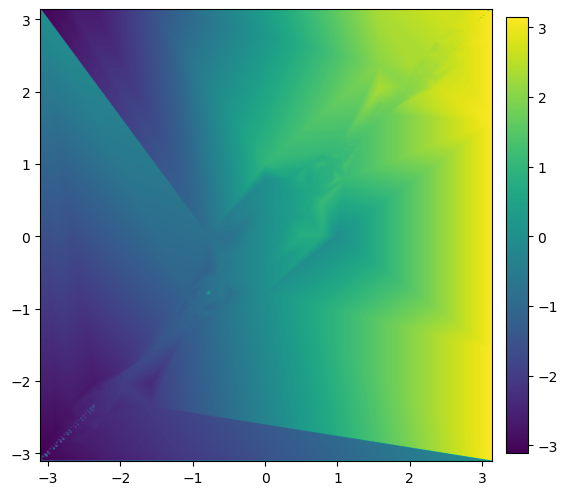

In [24]:
plot_2d_image(a[:, 0], a[:, 1], a[:, 2])